# Group 4 | Final Project Group Coding




## Import Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


*Read in the csv files as singular dataframes*.

In [ ]:
df_3 = pd.read_csv("Sample_3.csv")

df_4 = pd.read_csv("Sample_4.csv")

df_5 = pd.read_csv("Sample_5_corrected.csv")

In [ ]:
print(df_3.shape, df_4.shape, df_5.shape)

(370, 22) (340, 20) (305, 21)


## Combine all data into singular dataset (Data Cleaning)

#### Now we need to clean the data amungst all of the dataframes so we can combine the data smoothly.

- Swap 'female' and 'age' columns in df_4
- Drop 'chest', 'ethnicity', 'p_id' from all dataframes
- Concatinate all of the data along rows

In [ ]:
#DF 3 EDIT
df_3.drop('chest', axis=1, inplace=True)
df_3.drop('ethnicity', axis=1, inplace=True)
df_3.drop('p_id', axis=1, inplace=True)
df_3.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,23,0,34.0,1,3,3,1,1,1,3,1,4,1,3,3,3,3,4,1
1,19,0,30.0,4,4,2,1,3,2,4,5,3,4,1,5,4,3,5,3
2,18,1,20.0,4,5,4,5,4,2,2,5,1,2,4,5,2,4,1,1
3,19,0,38.0,2,1,2,3,4,5,4,4,2,5,2,3,4,2,4,4
4,19,0,39.0,3,2,4,2,2,3,4,3,2,1,4,4,4,4,2,3


In [ ]:
#DF 4 EDIT
df_4.drop('p_id', axis=1, inplace=True)
df_4[['age', 'female']] = df_4[['female', 'age']]
df_4.rename(columns={'age': 'temp_column', 'female': 'age'}, inplace=True)
df_4.rename(columns={'temp_column': 'female'}, inplace=True)

df_4.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,18.0,1,29.32,3.0,5,5,5,3,5,4,5,4.0,2.0,5,5.0,5.0,5,5,5
1,21.0,1,23.55,4.0,4,4,5,4,4,2,3,5.0,4.0,2,3.0,2.0,4,1,3
2,18.0,1,31.18,5.0,2,5,2,2,1,1,4,2.0,1.0,4,4.0,3.0,5,4,2
3,19.0,1,23.91,2.0,4,4,2,2,4,1,4,2.0,5.0,3,5.0,4.0,4,1,2
4,19.0,0,39.09,2.0,4,2,2,2,3,3,2,3.0,4.0,4,4.0,1.0,4,4,3


In [ ]:
#DF 5 EDIT
df_5.drop('ethnicity', axis=1, inplace=True)
df_5.drop('p_id', axis=1, inplace=True)
df_5.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,18,0,36.40,4,4,2,2,4,2,4,4,2,4,4,2,2,4,3,4
1,20,0,34.24,2,2,4,5,4,2,3,5,5,1,2,5,2,3,5,1
2,18,0,38.86,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,19,0,33.69,4,4,3,3,3,2,3,4,3,5,2,4,2,4,5,2
4,19,0,47.53,2,4,2,4,3,3,4,4,3,4,3,4,3,3,3,3


In [ ]:
#Combine Dataset
combined_df = pd.concat([df_3, df_4, df_5], ignore_index=True)
combined_df.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
0,23.0,0,34.0,1.0,3,3,1,1,1,3,1,4.0,1.0,3,3.0,3.0,3,4,1
1,19.0,0,30.0,4.0,4,2,1,3,2,4,5,3.0,4.0,1,5.0,4.0,3,5,3
2,18.0,1,20.0,4.0,5,4,5,4,2,2,5,1.0,2.0,4,5.0,2.0,4,1,1
3,19.0,0,38.0,2.0,1,2,3,4,5,4,4,2.0,5.0,2,3.0,4.0,2,4,4
4,19.0,0,39.0,3.0,2,4,2,2,3,4,3,2.0,1.0,4,4.0,4.0,4,2,3


In [ ]:
combined_df.shape

(1015, 19)

## Data Preprocessing and EDA

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1002 non-null   float64
 1   female  1015 non-null   int64  
 2   grip    1015 non-null   float64
 3   hex_5   1013 non-null   float64
 4   hex_11  1015 non-null   int64  
 5   hex_17  1015 non-null   int64  
 6   hex_23  1015 non-null   int64  
 7   hex_29  1015 non-null   int64  
 8   hex_35  1015 non-null   int64  
 9   hex_41  1015 non-null   int64  
 10  hex_47  1015 non-null   int64  
 11  hex_53  1014 non-null   float64
 12  hex_59  1014 non-null   float64
 13  hex_65  1015 non-null   int64  
 14  hex_71  1013 non-null   float64
 15  hex_77  1014 non-null   float64
 16  hex_83  1015 non-null   int64  
 17  hex_89  1015 non-null   int64  
 18  hex_95  1015 non-null   int64  
dtypes: float64(7), int64(12)
memory usage: 150.8 KB


In [ ]:
combined_df.describe()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,hex_59,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95
count,1002.000000,1015.000000,1015.000000,1013.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1014.000000,1014.000000,1015.000000,1013.000000,1014.000000,1015.000000,1015.000000,1015.000000
mean,19.291417,0.555665,29.050187,3.070089,3.933990,3.291626,3.000000,3.085714,2.975369,3.187192,3.714286,3.019724,3.082840,3.599015,3.969398,3.019724,4.141872,3.089655,2.973399
std,1.673949,0.497137,11.888353,1.223947,1.032307,1.152854,1.240347,1.184025,1.307837,1.177716,0.973588,1.140481,1.321491,1.048996,1.002985,1.203649,0.868908,1.268975,1.251540
min,18.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,0.000000,20.025000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,2.000000
50%,19.000000,1.000000,27.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,20.000000,1.000000,37.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000
max,38.000000,1.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Handle missing values
combined_df = combined_df.dropna()
combined_df.shape

(997, 19)

### Check Correlations between personality traits, as well as grip strength

__Scoring Key for HEXACO-100 items:__
1. Fearfulness
5, 29, 53, 77
2. Anxiety
11, 35, 59, 83
3. Dependence
17, 41, 65, 89
4. Sentimentality
23, 47, 71, 95

#### Feature Engineering

In [ ]:
# Extract the columns corresponding to fearfulness, anxiety, dependence, and sentimentality
fearfulness_columns = [f'hex_{i}' for i in [5, 29, 53, 77]]
anxiety_columns = [f'hex_{i}' for i in [11, 35, 59, 83]]
dependence_columns = [f'hex_{i}' for i in [17, 41, 65, 89]]
sentimentality_columns = [f'hex_{i}' for i in [23, 47, 71, 95]]

# Sum the scores for each dimension
combined_df['Fearfulness_Score'] = combined_df[fearfulness_columns].sum(axis=1)
combined_df['Anxiety_Score'] = combined_df[anxiety_columns].sum(axis=1)
combined_df['Dependence_Score'] = combined_df[dependence_columns].sum(axis=1)
combined_df['Sentimentality_Score'] = combined_df[sentimentality_columns].sum(axis=1)

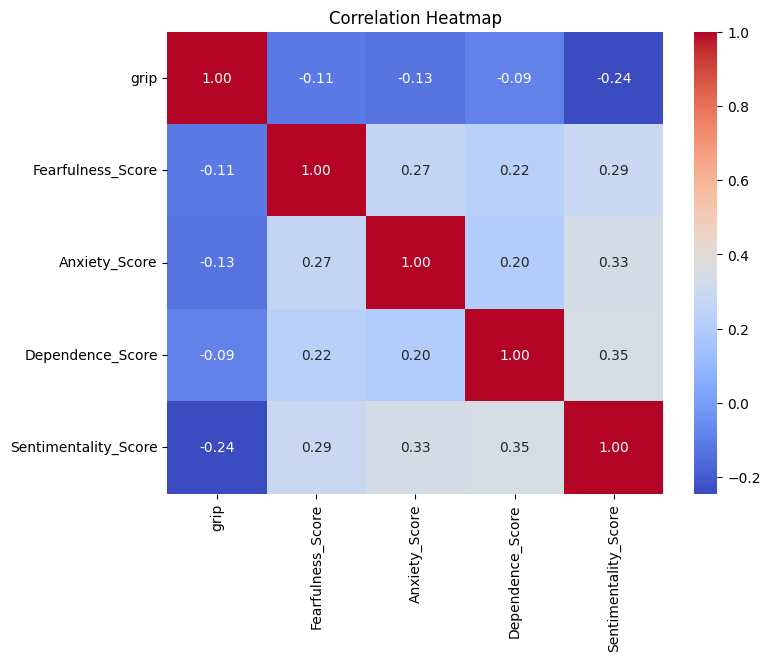

In [ ]:
#Display Heatmap of Correlations
feature_columns = ['Fearfulness_Score', 'Anxiety_Score', 'Dependence_Score', 'Sentimentality_Score']

correlation = combined_df[['grip'] + feature_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Standardize the Data & Define Feature and Target Sets (X & y)

In [ ]:
def standardizeData(data):
    from sklearn.preprocessing import MinMaxScaler

    # Create a StandardScaler object
    scaler = MinMaxScaler()

    # Fit the scaler to data
    scaler.fit(data)

    # Transform data using the scaler to standardize it, return as DataFrame
    return pd.DataFrame(scaler.transform(data))


In [ ]:
X = combined_df.drop("grip", axis = 1)

y = combined_df["grip"]

column_names = X.columns.tolist()

X = standardizeData(X)

X.columns = column_names

X.head()

,age,female,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,...,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95,Fearfulness_Score,Anxiety_Score,Dependence_Score,Sentimentality_Score
0,0.25,0.0,0.00,0.50,0.50,0.00,0.00,0.00,0.50,0.00,...,0.50,0.50,0.50,0.50,0.75,0.00,0.3125,0.142857,0.5625,0.000000
1,0.05,0.0,0.75,0.75,0.25,0.00,0.50,0.25,0.75,1.00,...,0.00,1.00,0.75,0.50,1.00,0.50,0.6250,0.500000,0.5000,0.571429
2,0.00,1.0,0.75,1.00,0.75,1.00,0.75,0.25,0.25,1.00,...,0.75,1.00,0.25,0.75,0.00,0.00,0.4375,0.500000,0.4375,0.714286
3,0.05,0.0,0.25,0.00,0.25,0.50,0.75,1.00,0.75,0.75,...,0.25,0.50,0.75,0.25,0.75,0.75,0.5000,0.500000,0.5000,0.571429
4,0.05,0.0,0.50,0.25,0.75,0.25,0.25,0.50,0.75,0.50,...,0.75,0.75,0.75,0.75,0.25,0.50,0.4375,0.285714,0.6250,0.428571


## Regression

### Both Genders Random Forest Regressor (initial idea)

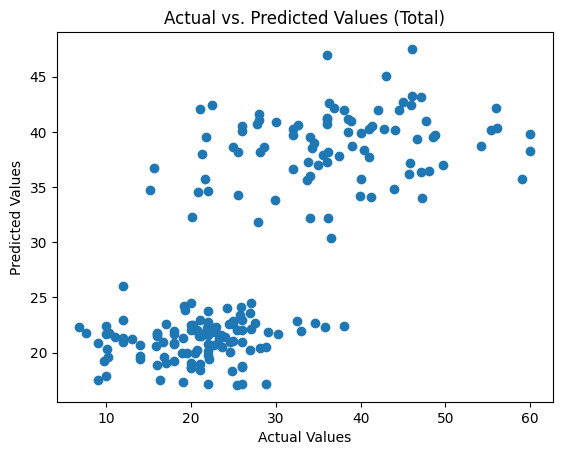

Mean Squared Error: 66.39736513003334
R2 Value: 0.506347182707761


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model.predict(X_test)


# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Total)')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Value: {r2}')

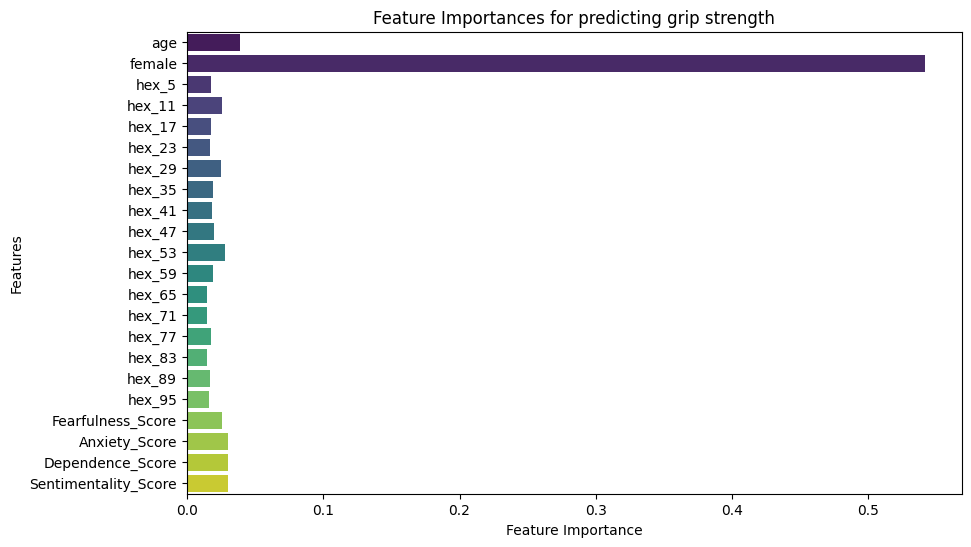

In [ ]:
feature_importances = rf_model.feature_importances_

# Get names of features
features = list(X.columns)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=list(features), x=list(feature_importances), orient='h', palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for predicting grip strength')
plt.show()

#### We clearly need to divide dataset into gender groups for meaningful analysis

In [ ]:
female_df = combined_df[combined_df['female'] == 1]
male_df = combined_df[combined_df['female'] == 0]

male_df.head()

,age,female,grip,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,...,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95,Fearfulness_Score,Anxiety_Score,Dependence_Score,Sentimentality_Score
0,23.0,0,34.0,1.0,3,3,1,1,1,3,...,3,3.0,3.0,3,4,1,9.0,8.0,13,6.0
1,19.0,0,30.0,4.0,4,2,1,3,2,4,...,1,5.0,4.0,3,5,3,14.0,13.0,12,14.0
3,19.0,0,38.0,2.0,1,2,3,4,5,4,...,2,3.0,4.0,2,4,4,12.0,13.0,12,14.0
4,19.0,0,39.0,3.0,2,4,2,2,3,4,...,4,4.0,4.0,4,2,3,11.0,10.0,14,12.0
6,19.0,0,42.0,4.0,5,4,2,4,1,4,...,4,4.0,1.0,4,2,3,13.0,11.0,14,13.0


### Male Dataset RFR

In [ ]:
male_X = male_df.drop("grip", axis = 1)
male_X = male_X.drop("female", axis = 1)

male_y = male_df["grip"]

column_names = male_X.columns.tolist()

male_X = standardizeData(male_X)

male_X.columns = column_names

male_X.head()

,age,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,...,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95,Fearfulness_Score,Anxiety_Score,Dependence_Score,Sentimentality_Score
0,0.416667,0.00,0.50,0.50,0.00,0.00,0.00,0.50,0.00,0.75,...,0.50,0.50,0.50,0.50,0.75,0.00,0.3125,0.142857,0.533333,0.000000
1,0.083333,0.75,0.75,0.25,0.00,0.50,0.25,0.75,1.00,0.50,...,0.00,1.00,0.75,0.50,1.00,0.50,0.6250,0.500000,0.466667,0.571429
2,0.083333,0.25,0.00,0.25,0.50,0.75,1.00,0.75,0.75,0.25,...,0.25,0.50,0.75,0.25,0.75,0.75,0.5000,0.500000,0.466667,0.571429
3,0.083333,0.50,0.25,0.75,0.25,0.25,0.50,0.75,0.50,0.25,...,0.75,0.75,0.75,0.75,0.25,0.50,0.4375,0.285714,0.600000,0.428571
4,0.083333,0.75,1.00,0.75,0.25,0.75,0.00,0.75,0.75,0.75,...,0.75,0.75,0.00,0.75,0.25,0.50,0.5625,0.357143,0.600000,0.500000


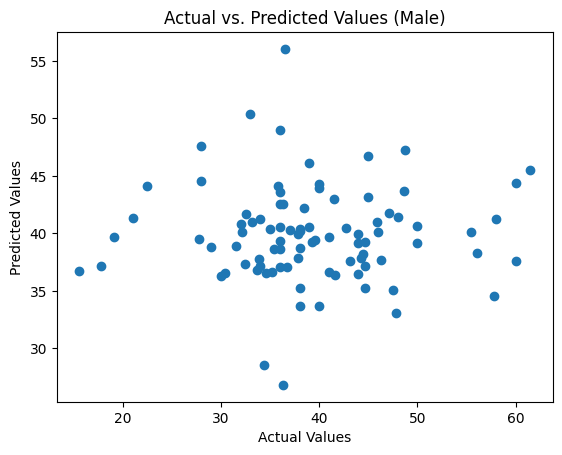

Mean Squared Error: 97.01340692456614
R2 Value: -0.21398166116713124


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(male_X, male_y, test_size=0.2, random_state=42)


# Create the model
rf_model2 = RandomForestRegressor(n_estimators=400, random_state=42)

# Train the model
rf_model2.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model2.predict(X_test)


# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Male)')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Value: {r2}')


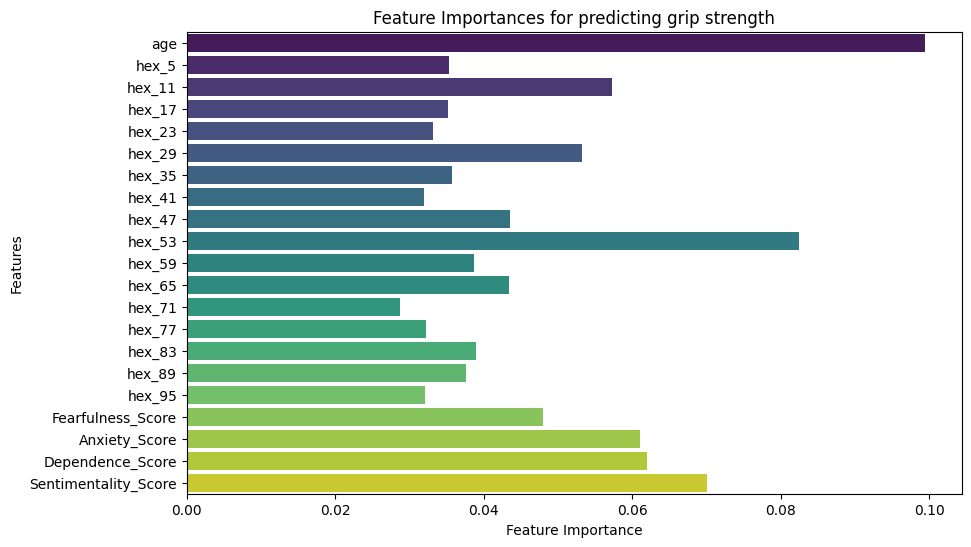

In [ ]:
# Get feature importances
feature_importances2 = rf_model2.feature_importances_

# Get names of features
features2 = list(male_X.columns)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=list(features2), x=list(feature_importances2), orient='h', palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for predicting grip strength')
plt.show()

### Male Lasso and Ridge Regression

In [ ]:
# Define a range of alpha values
alpha_values = [0.1, 0.5, 1.0, 2.0]

# Iterate over alpha values for Lasso
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print(f"Lasso Regression (alpha={alpha}): MSE = {mse_lasso}, R2 = {r2_lasso}")

# Iterate over alpha values for Ridge
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print(f"Ridge Regression (alpha={alpha}): MSE = {mse_ridge}, R2 = {r2_ridge}")

Lasso Regression (alpha=0.1): MSE = 83.50960511898725, R2 = -0.04500122570262688
Lasso Regression (alpha=0.5): MSE = 79.5500180116964, R2 = 0.004547246889234247
Lasso Regression (alpha=1.0): MSE = 80.11055495597148, R2 = -0.0024670575489733615
Lasso Regression (alpha=2.0): MSE = 80.11055495597148, R2 = -0.0024670575489733615
Ridge Regression (alpha=0.1): MSE = 93.40734142010587, R2 = -0.16885699716284464
Ridge Regression (alpha=0.5): MSE = 92.73484048349196, R2 = -0.1604416262357955
Ridge Regression (alpha=1.0): MSE = 91.95763730209036, R2 = -0.15071605902676088
Ridge Regression (alpha=2.0): MSE = 90.58065658197523, R2 = -0.1334851484238555


Lasso Regression (alpha=0.5): MSE = 79.5500180116964, R2 = 0.004547246889234247


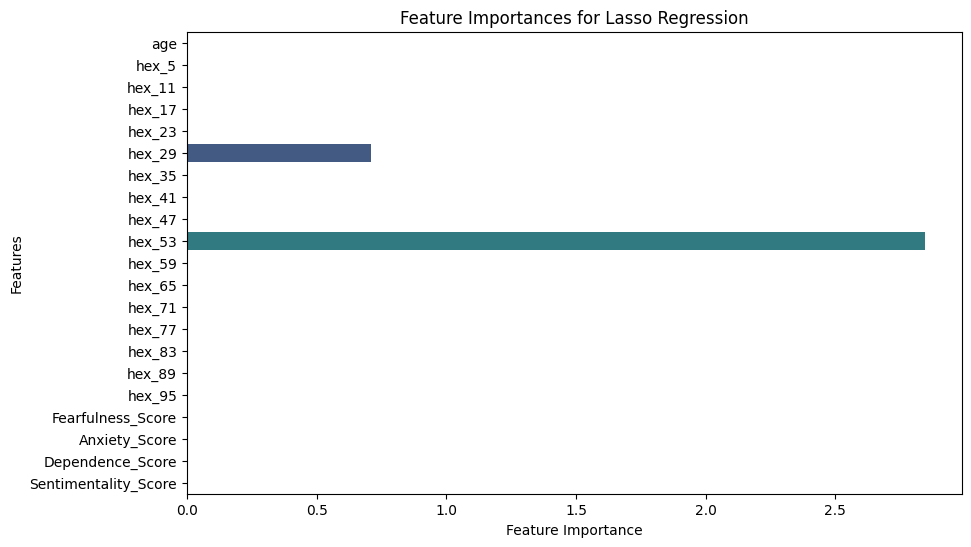

In [ ]:
# Lasso Regression with alpha=0.5
alpha_lasso = 0.5
lasso_reg = Lasso(alpha=alpha_lasso)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression (alpha={alpha_lasso}): MSE = {mse_lasso}, R2 = {r2_lasso}")

# Get lasso feature importances
lasso_feature_importances = np.abs(lasso_reg.coef_)

# Get names of features (you may need to replace this with your feature names)
lasso_features = list(male_X.columns)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=lasso_features, x=lasso_feature_importances, orient='h', palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Lasso Regression')
plt.show()

### Female Dataset RFR

In [ ]:
female_X = female_df.drop("grip", axis = 1)
female_X = female_X.drop("female", axis = 1)

female_y = female_df["grip"]

column_names = female_X.columns.tolist()

female_X = standardizeData(female_X)

female_X.columns = column_names

female_X.head()

,age,hex_5,hex_11,hex_17,hex_23,hex_29,hex_35,hex_41,hex_47,hex_53,...,hex_65,hex_71,hex_77,hex_83,hex_89,hex_95,Fearfulness_Score,Anxiety_Score,Dependence_Score,Sentimentality_Score
0,0.00,0.75,1.00,0.75,1.00,0.75,0.25,0.25,1.00,0.00,...,0.75,1.00,0.25,0.75,0.00,0.00,0.400000,0.500000,0.4375,0.714286
1,0.05,0.25,0.75,0.75,0.75,0.50,0.25,0.75,0.75,0.25,...,0.75,0.75,0.75,0.75,0.50,0.25,0.400000,0.357143,0.6875,0.571429
2,0.10,0.75,1.00,1.00,1.00,0.00,0.00,0.25,1.00,0.75,...,1.00,1.00,0.00,0.75,0.00,0.00,0.333333,0.500000,0.5625,0.714286
3,0.05,0.25,0.00,0.50,0.75,0.75,1.00,0.75,0.50,0.25,...,0.75,0.75,0.75,0.75,0.75,0.25,0.466667,0.642857,0.6875,0.500000
4,0.15,0.25,0.75,0.75,0.75,0.00,0.75,0.25,0.50,0.75,...,0.75,1.00,0.50,0.75,0.25,0.50,0.333333,0.571429,0.5000,0.642857


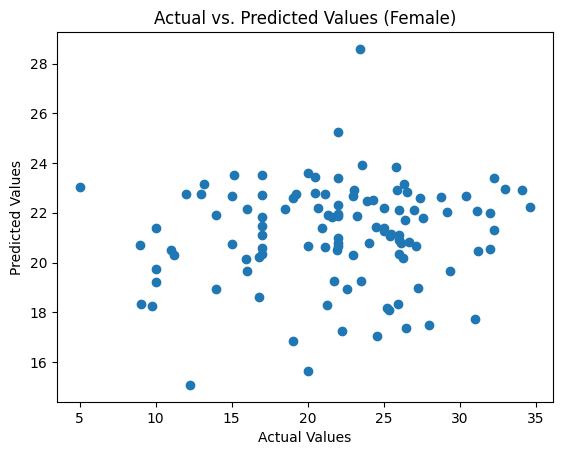

Mean Squared Error: 40.611093232004464
R2 Value: -0.04872915167957559


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(female_X, female_y, test_size=0.2, random_state=42)


# Create the model
rf_model3 = RandomForestRegressor(n_estimators=400, random_state=42)

# Train the model
rf_model3.fit(X_train, y_train)

# Predict target with X_Test
y_pred = rf_model3.predict(X_test)


# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Female)')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Value: {r2}')

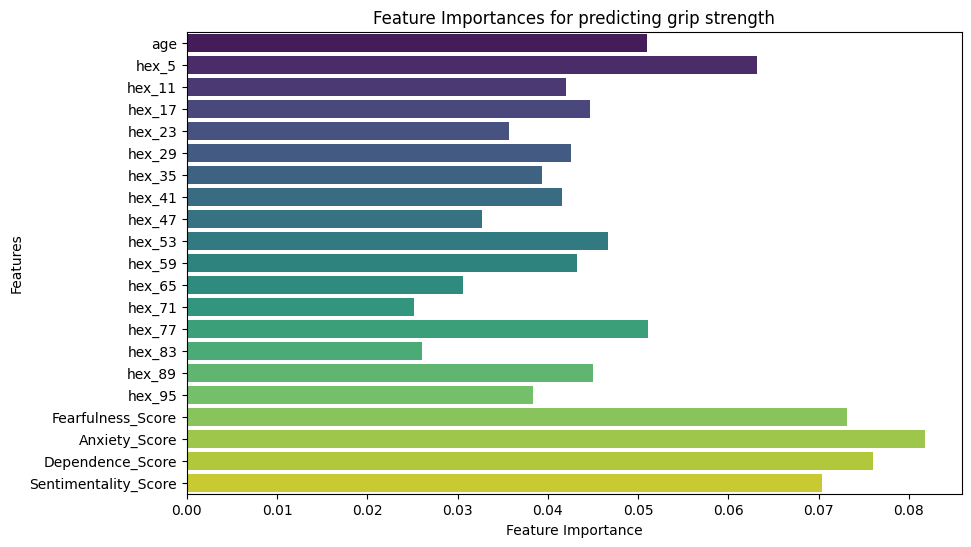

In [ ]:
# Get feature importances
feature_importances3 = rf_model3.feature_importances_

# Get names of features
features3 = list(female_X.columns)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=list(features3), x=list(feature_importances3), orient='h', palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for predicting grip strength')
plt.show()

### Female Lasso and Ridge Regression

In [ ]:
# Define a range of alpha values
alpha_values = [0.1, 0.5, 1.0, 2.0]

# Iterate over alpha values for Lasso
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print(f"Lasso Regression (alpha={alpha}): MSE = {mse_lasso}, R2 = {r2_lasso}")

# Iterate over alpha values for Ridge
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print(f"Ridge Regression (alpha={alpha}): MSE = {mse_ridge}, R2 = {r2_ridge}")

Lasso Regression (alpha=0.1): MSE = 39.37971960194815, R2 = -0.01693051441876281
Lasso Regression (alpha=0.5): MSE = 39.22615675681232, R2 = -0.012964951822632464
Lasso Regression (alpha=1.0): MSE = 39.22615675681232, R2 = -0.012964951822632464
Lasso Regression (alpha=2.0): MSE = 39.22615675681232, R2 = -0.012964951822632464
Ridge Regression (alpha=0.1): MSE = 40.38290780996992, R2 = -0.04283655719292079
Ridge Regression (alpha=0.5): MSE = 40.300998097045586, R2 = -0.04072134440466324
Ridge Regression (alpha=1.0): MSE = 40.21145341049359, R2 = -0.03840896826081974
Ridge Regression (alpha=2.0): MSE = 40.0627658623555, R2 = -0.03456930392739843


## Classification (with thresholds for grip strength as classes)

### Male Random Forest Classifier

In [ ]:
#Use stat description of grip to determine thresholds (roughly 25% and 75% marks)
columnStats = male_df["grip"].describe()
columnStats

count    445.000000
mean      38.838045
std        9.823483
min       12.570000
25%       32.950000
50%       38.050000
75%       44.640000
max      100.000000
Name: grip, dtype: float64

Random Forest Classification with Accuracy below:

In [ ]:
# Split the data into train and test sets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(male_X, male_y, test_size=0.2, random_state=42)


# Define threshold values for low, medium, and high
low_threshold_0 = columnStats['25%']
high_threshold_0 = columnStats['75%']

# Create a new column 'Group' based on threshold values for training data
y_train_grouped_0 = np.select(
    [y_train_0 < low_threshold_0,
     (y_train_0 >= low_threshold_0) & (y_train_0 <= high_threshold_0),
     y_train_0 > high_threshold_0],
    ['Low', 'Medium', 'High'])

In [ ]:
# Create the classifier model
rf_classifier = RandomForestClassifier(n_estimators=400, max_depth = 50, random_state=42)

# Train the classifier on the grouped labels
rf_classifier.fit(X_train_0, y_train_grouped_0)

# Apply the same thresholding to the test set
y_test_grouped_0 = np.select(
    [y_test_0 < low_threshold_0,
     (y_test_0 >= low_threshold_0) & (y_test_0 <= high_threshold_0),
     y_test_0 > high_threshold_0],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped_0 = rf_classifier.predict(X_test_0)


# Evaluate the model
accuracy_rf = accuracy_score(y_test_grouped_0, y_pred_grouped_0)
conf_matrix_rf = confusion_matrix(y_test_grouped_0, y_pred_grouped_0)
class_report_rf = classification_report(y_test_grouped_0, y_pred_grouped_0)

print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.4943820224719101
Confusion Matrix:
[[ 3  2 17]
 [ 1  1 14]
 [ 3  8 40]]
Classification Report:
              precision    recall  f1-score   support

        High       0.43      0.14      0.21        22
         Low       0.09      0.06      0.07        16
      Medium       0.56      0.78      0.66        51

    accuracy                           0.49        89
   macro avg       0.36      0.33      0.31        89
weighted avg       0.45      0.49      0.44        89



Logistic Classifier with Accuracy below:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the data into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(male_X, male_y, test_size=0.2, random_state=42)


# Define threshold values for low, medium, and high
low_threshold_1 = columnStats['25%']
high_threshold_1 = columnStats['75%']

# Create a new column 'Group' based on threshold values for training data
y_train_grouped_1 = np.select(
    [y_train_1 < low_threshold_1,
     (y_train_1 >= low_threshold_1) & (y_train_1 <= high_threshold_1),
     y_train_1 > high_threshold_1],
    ['Low', 'Medium', 'High'])

In [ ]:
# Create the classifier model
lr_classifier = LogisticRegression(max_iter=100, random_state=42)

# Train the classifier on the grouped labels
lr_classifier.fit(X_train_1, y_train_grouped_1)

# Apply the same thresholding to the test set
y_test_grouped_1 = np.select(
    [y_test_1 < low_threshold_1,
     (y_test_1 >= low_threshold_1) & (y_test_1 <= high_threshold_1),
     y_test_1 > high_threshold_1],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped_1 = lr_classifier.predict(X_test_1)


# Evaluate the model
accuracy_lr = accuracy_score(y_test_grouped_1, y_pred_grouped_1)
conf_matrix_lr = confusion_matrix(y_test_grouped_1, y_pred_grouped_1)
class_report_lr = classification_report(y_test_grouped_1, y_pred_grouped_1)

print(f'Accuracy: {accuracy_lr}')
print('Confusion Matrix:')
print(conf_matrix_lr)
print('Classification Report:')
print(class_report_lr)

Accuracy: 0.5168539325842697
Confusion Matrix:
[[ 4  1 17]
 [ 1  1 14]
 [ 4  6 41]]
Classification Report:
              precision    recall  f1-score   support

        High       0.44      0.18      0.26        22
         Low       0.12      0.06      0.08        16
      Medium       0.57      0.80      0.67        51

    accuracy                           0.52        89
   macro avg       0.38      0.35      0.34        89
weighted avg       0.46      0.52      0.46        89



Bagging Classification with Accuracy below:

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the data into train and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(male_X, male_y, test_size=0.2, random_state=42)


# Define threshold values for low, medium, and high
low_threshold_2 = columnStats['25%']
high_threshold_2 = columnStats['75%']

# Create a new column 'Group' based on threshold values for training data
y_train_grouped_2 = np.select(
    [y_train_2 < low_threshold_2,
     (y_train_2 >= low_threshold_2) & (y_train_2 <= high_threshold_2),
     y_train_2 > high_threshold_2],
    ['Low', 'Medium', 'High'])

In [ ]:
# Create the classifier model
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the classifier on the grouped labels
bagging_model.fit(X_train_2, y_train_grouped_2)

# Apply the same thresholding to the test set
y_test_grouped_2 = np.select(
    [y_test_2 < low_threshold_2,
     (y_test_2 >= low_threshold_2) & (y_test_2 <= high_threshold_2),
     y_test_2 > high_threshold_2],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped_2 = bagging_model.predict(X_test_2)


# Evaluate the model
accuracy_b = accuracy_score(y_test_grouped_2, y_pred_grouped_2)
conf_matrix_b = confusion_matrix(y_test_grouped_2, y_pred_grouped_2)
class_report_b = classification_report(y_test_grouped_2, y_pred_grouped_2)

print(f'Accuracy: {accuracy_b}')
print('Confusion Matrix:')
print(conf_matrix_b)
print('Classification Report:')
print(class_report_b)

Accuracy: 0.43820224719101125
Confusion Matrix:
[[ 7  3 12]
 [ 3  4  9]
 [13 10 28]]
Classification Report:
              precision    recall  f1-score   support

        High       0.30      0.32      0.31        22
         Low       0.24      0.25      0.24        16
      Medium       0.57      0.55      0.56        51

    accuracy                           0.44        89
   macro avg       0.37      0.37      0.37        89
weighted avg       0.44      0.44      0.44        89



Classification Final Results Table below:

In [ ]:
from sklearn.metrics import f1_score
from tabulate import tabulate

In [ ]:
f1_rf = f1_score(y_test_grouped_0, y_pred_grouped_0, average='weighted')

f1_lr = f1_score(y_test_grouped_1, y_pred_grouped_1, average='weighted')

f1_b = f1_score(y_test_grouped_2, y_pred_grouped_2, average='weighted')

In [ ]:
model_names = ["Random Forest", "Logistic Regression", "Bagging"]
accuracies = [accuracy_rf, accuracy_lr, accuracy_b]
F1_Scores = [f1_rf, f1_lr, f1_b]

In [ ]:
table_data = list(zip(model_names, accuracies, F1_Scores))

# Define table headers
headers = ["Model", "Accuracy", "F1 Score"]

# Use the tabulate function to format the table
table = tabulate(table_data, headers, tablefmt="pretty")

# Print the table
print(table)

+---------------------+---------------------+---------------------+
|        Model        |      Accuracy       |      F1 Score       |
+---------------------+---------------------+---------------------+
|    Random Forest    | 0.4943820224719101  | 0.44021946375208876 |
| Logistic Regression | 0.5168539325842697  | 0.46079497402440495 |
|       Bagging       | 0.43820224719101125 | 0.44138463284530705 |
+---------------------+---------------------+---------------------+


***FEMALE***

### Female Random Forest Classifier (with thresholds for grip strength)

In [ ]:
#Use stat description of grip to determine thresholds (roughly 25% and 75% marks)
columnStats = female_df["grip"].describe()
columnStats

count    552.000000
mean      21.329058
std        6.462872
min        5.000000
25%       17.000000
50%       21.785000
75%       25.837500
max       50.000000
Name: grip, dtype: float64

Random Forest Classification with Accuracy below:

In [ ]:
# Split the data into train and test sets
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(female_X, female_y, test_size=0.2, random_state=42)


# Define threshold values for low, medium, and high
low_threshold_0 = columnStats['25%']
high_threshold_0 = columnStats['75%']

# Create a new column 'Group' based on threshold values for training data
y_train_grouped_0 = np.select(
    [y_train_0 < low_threshold_0,
     (y_train_0 >= low_threshold_0) & (y_train_0 <= high_threshold_0),
     y_train_0 > high_threshold_0],
    ['Low', 'Medium', 'High'])

In [ ]:
# Create the classifier model
rf_classifier = RandomForestClassifier(n_estimators=400, max_depth = 50, random_state=42)

# Train the classifier on the grouped labels
rf_classifier.fit(X_train_0, y_train_grouped_0)

# Apply the same thresholding to the test set
y_test_grouped_0 = np.select(
    [y_test_0 < low_threshold_0,
     (y_test_0 >= low_threshold_0) & (y_test_0 <= high_threshold_0),
     y_test_0 > high_threshold_0],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped_0 = rf_classifier.predict(X_test_0)


# Evaluate the model
accuracy_rf = accuracy_score(y_test_grouped_0, y_pred_grouped_0)
conf_matrix_rf = confusion_matrix(y_test_grouped_0, y_pred_grouped_0)
class_report_rf = classification_report(y_test_grouped_0, y_pred_grouped_0)

print(f'Accuracy: {accuracy_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.43243243243243246
Confusion Matrix:
[[ 2  3 28]
 [ 2  3 18]
 [ 2 10 43]]
Classification Report:
              precision    recall  f1-score   support

        High       0.33      0.06      0.10        33
         Low       0.19      0.13      0.15        23
      Medium       0.48      0.78      0.60        55

    accuracy                           0.43       111
   macro avg       0.33      0.32      0.28       111
weighted avg       0.38      0.43      0.36       111



Logistic Classifier with Accuracy below:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the data into train and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(female_X, female_y, test_size=0.2, random_state=42)


# Define threshold values for low, medium, and high
low_threshold_1 = columnStats['25%']
high_threshold_1 = columnStats['75%']

# Create a new column 'Group' based on threshold values for training data
y_train_grouped_1 = np.select(
    [y_train_1 < low_threshold_1,
     (y_train_1 >= low_threshold_1) & (y_train_1 <= high_threshold_1),
     y_train_1 > high_threshold_1],
    ['Low', 'Medium', 'High'])

In [ ]:
# Create the classifier model
lr_classifier = LogisticRegression(max_iter=100, random_state=42)

# Train the classifier on the grouped labels
lr_classifier.fit(X_train_1, y_train_grouped_1)

# Apply the same thresholding to the test set
y_test_grouped_1 = np.select(
    [y_test_1 < low_threshold_1,
     (y_test_1 >= low_threshold_1) & (y_test_1 <= high_threshold_1),
     y_test_1 > high_threshold_1],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped_1 = lr_classifier.predict(X_test_1)


# Evaluate the model
accuracy_lr = accuracy_score(y_test_grouped_1, y_pred_grouped_1)
conf_matrix_lr = confusion_matrix(y_test_grouped_1, y_pred_grouped_1)
class_report_lr = classification_report(y_test_grouped_1, y_pred_grouped_1)

print(f'Accuracy: {accuracy_lr}')
print('Confusion Matrix:')
print(conf_matrix_lr)
print('Classification Report:')
print(class_report_lr)

Accuracy: 0.5045045045045045
Confusion Matrix:
[[ 6  1 26]
 [ 0  2 21]
 [ 4  3 48]]
Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.18      0.28        33
         Low       0.33      0.09      0.14        23
      Medium       0.51      0.87      0.64        55

    accuracy                           0.50       111
   macro avg       0.48      0.38      0.35       111
weighted avg       0.50      0.50      0.43       111



Bagging Classification with Accuracy below:

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the data into train and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(female_X, female_y, test_size=0.2, random_state=42)


# Define threshold values for low, medium, and high
low_threshold_2 = columnStats['25%']
high_threshold_2 = columnStats['75%']

# Create a new column 'Group' based on threshold values for training data
y_train_grouped_2 = np.select(
    [y_train_2 < low_threshold_2,
     (y_train_2 >= low_threshold_2) & (y_train_2 <= high_threshold_2),
     y_train_2 > high_threshold_2],
    ['Low', 'Medium', 'High'])

In [ ]:
# Create the classifier model
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier
bagging_model = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the classifier on the grouped labels
bagging_model.fit(X_train_2, y_train_grouped_2)

# Apply the same thresholding to the test set
y_test_grouped_2 = np.select(
    [y_test_2 < low_threshold_2,
     (y_test_2 >= low_threshold_2) & (y_test_2 <= high_threshold_2),
     y_test_2 > high_threshold_2],
    ['Low', 'Medium', 'High'])

# Predict target with X_Test
y_pred_grouped_2 = bagging_model.predict(X_test_2)


# Evaluate the model
accuracy_b = accuracy_score(y_test_grouped_2, y_pred_grouped_2)
conf_matrix_b = confusion_matrix(y_test_grouped_2, y_pred_grouped_2)
class_report_b = classification_report(y_test_grouped_2, y_pred_grouped_2)

print(f'Accuracy: {accuracy_b}')
print('Confusion Matrix:')
print(conf_matrix_b)
print('Classification Report:')
print(class_report_b)

Accuracy: 0.43243243243243246
Confusion Matrix:
[[12  7 14]
 [ 6  8  9]
 [13 14 28]]
Classification Report:
              precision    recall  f1-score   support

        High       0.39      0.36      0.38        33
         Low       0.28      0.35      0.31        23
      Medium       0.55      0.51      0.53        55

    accuracy                           0.43       111
   macro avg       0.40      0.41      0.40       111
weighted avg       0.44      0.43      0.44       111



Classification Final Results Table below:

In [ ]:
from sklearn.metrics import f1_score
from tabulate import tabulate

In [ ]:
f1_rf = f1_score(y_test_grouped_0, y_pred_grouped_0, average='weighted')

f1_lr = f1_score(y_test_grouped_1, y_pred_grouped_1, average='weighted')

f1_b = f1_score(y_test_grouped_2, y_pred_grouped_2, average='weighted')

In [ ]:
model_names = ["Random Forest", "Logistic Regression", "Bagging"]
accuracies = [accuracy_rf, accuracy_lr, accuracy_b]
F1_Scores = [f1_rf, f1_lr, f1_b]

In [ ]:
table_data = list(zip(model_names, accuracies, F1_Scores))

# Define table headers
headers = ["Model", "Accuracy", "F1 Score"]

# Use the tabulate function to format the table
table = tabulate(table_data, headers, tablefmt="pretty")

# Print the table
print(table)

+---------------------+---------------------+---------------------+
|        Model        |      Accuracy       |      F1 Score       |
+---------------------+---------------------+---------------------+
|    Random Forest    | 0.43243243243243246 | 0.3582909832909833  |
| Logistic Regression | 0.5045045045045045  | 0.4286641091773409  |
|       Bagging       | 0.43243243243243246 | 0.43701375540998183 |
+---------------------+---------------------+---------------------+


## K-Means Clustering

First, plot an elbow plot to see what number of clusters k is ideal for k-means clustering.

In [ ]:
k_df = combined_df

In [ ]:
k_df2 = k_df.drop(columns=['age', 'female', 'grip'])

In [ ]:
male_k = male_X
male_k = male_X.drop("age", axis = 1)

female_k = female_X
female_k = female_k.drop("age", axis = 1)

In [ ]:
female_non_std = combined_df[combined_df['female'] == 1]
male_non_std = combined_df[combined_df['female'] == 0]

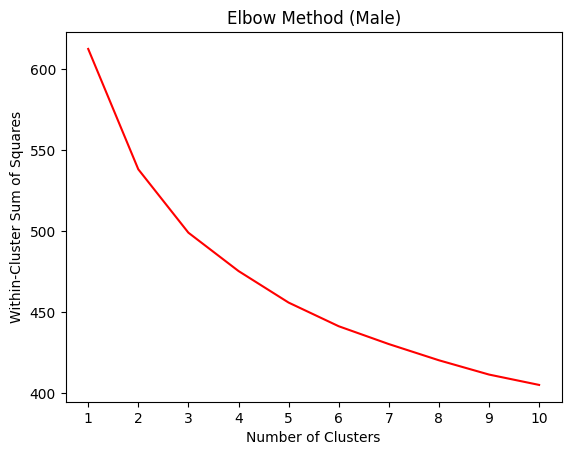

In [ ]:

# male
wcss = []
# k= 1 to 10
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init = "k-means++", n_init=10, random_state=0)
    k_means.fit(male_k)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss, c="red")
plt.xticks(range(1, 11, 1))
plt.title("Elbow Method (Male)")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

This plots an elbow plot for kmeans clustering of males only.

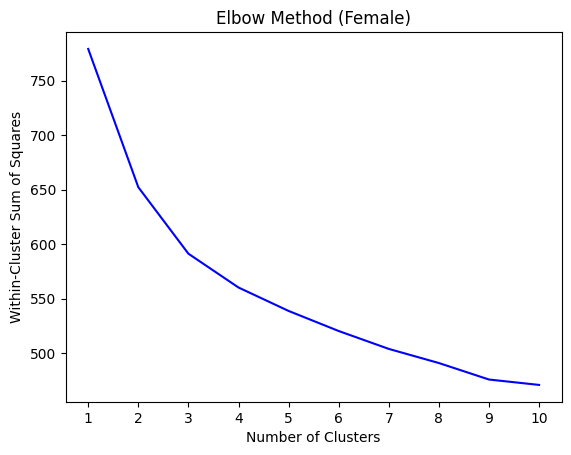

In [ ]:
# female
wcss = []
# k= 1 to 10
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init = "k-means++", n_init=10, random_state=0)
    k_means.fit(female_k)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss, c="blue")
plt.xticks(range(1, 11, 1))
plt.title("Elbow Method (Female)")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

This plots an elbow plot of females only, number of clusters against each cluster's within-cluster sum of squares.

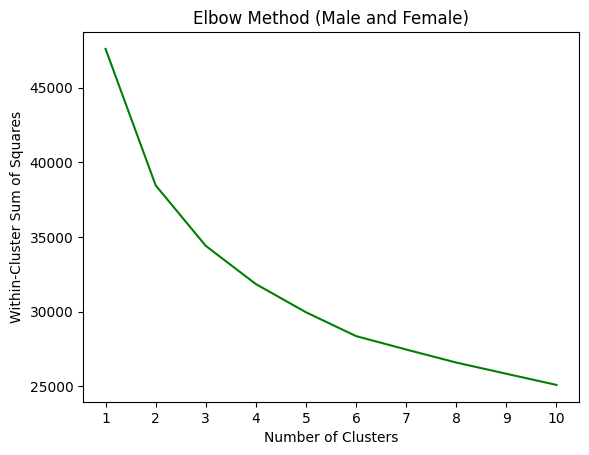

In [ ]:
# combined data of male and female
wcss = []
# k= 1 to 10
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init = "k-means++", n_init=10, random_state=0)
    k_means.fit(k_df2)
    wcss.append(k_means.inertia_)

plt.plot(range(1, 11), wcss, c="green")
plt.xticks(range(1, 11, 1))
plt.title("Elbow Method (Male and Female)")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

This plots an elbow plot for kmeans clustering of both males and females.

Ideal number of clusters seems to be K=4.

### Final "Trait vs Grip Strength" plots (based on k-means clustering results)

In [ ]:
#set dataset to combined, male, or female
dataset = combined_df

#Look at average of grip strength so that we can analyze plots
averageGrip = dataset['grip'].mean()
print(f'Average of grip strength: {averageGrip}')

Average of grip strength: 29.144002006018052


In [ ]:
# Standardize the data (important for k-means)
myScaler = StandardScaler()

# Create a function to apply clustering and plot the results
def cluster_and_plot(x_column, y_column, title):
    data = dataset[[x_column, y_column]]
    data = data.drop("grip", axis = 1)

    standardized_data = myScaler.fit_transform(data)

    # Choose the number of clusters (k)
    k = 4

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    dataset['Cluster'] = kmeans.fit_predict(standardized_data)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, hue='Cluster', data=dataset, palette='viridis', s=100)

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)


    # Print mean grip strength for each cluster
    mean_grip_strength = dataset.groupby('Cluster')['grip'].mean()
    print(f"\nMean Grip Strength for each Cluster:\n{mean_grip_strength}")

    # Show the plot
    plt.show()



Mean Grip Strength for each Cluster:
Cluster
0    25.603956
1    30.172509
2    30.265753
3    28.403740
Name: grip, dtype: float64


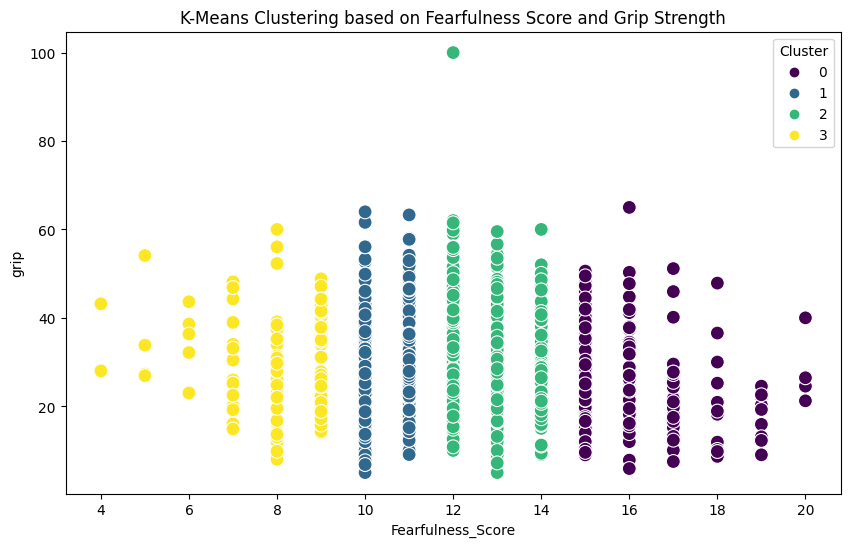

In [ ]:
# Apply clustering and plot for each dimension
cluster_and_plot('Fearfulness_Score', 'grip', 'K-Means Clustering based on Fearfulness Score and Grip Strength')


Mean Grip Strength for each Cluster:
Cluster
0    30.448281
1    29.848439
2    25.997558
3    29.482445
Name: grip, dtype: float64


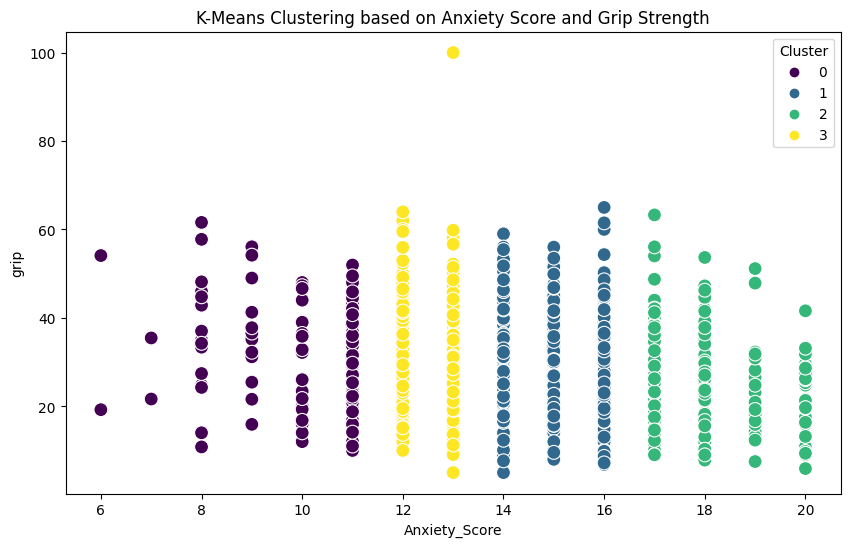

In [ ]:
cluster_and_plot('Anxiety_Score', 'grip', 'K-Means Clustering based on Anxiety Score and Grip Strength')


Mean Grip Strength for each Cluster:
Cluster
0    29.657360
1    26.416732
2    29.168730
3    29.689564
Name: grip, dtype: float64


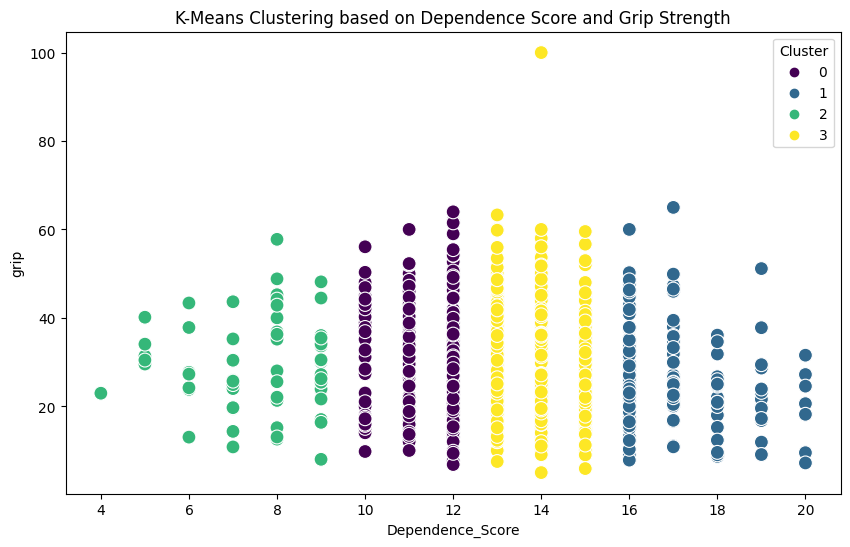

In [ ]:
cluster_and_plot('Dependence_Score', 'grip', 'K-Means Clustering based on Dependence Score and Grip Strength')


Mean Grip Strength for each Cluster:
Cluster
0    32.008391
1    24.390221
2    32.460476
3    27.975768
Name: grip, dtype: float64


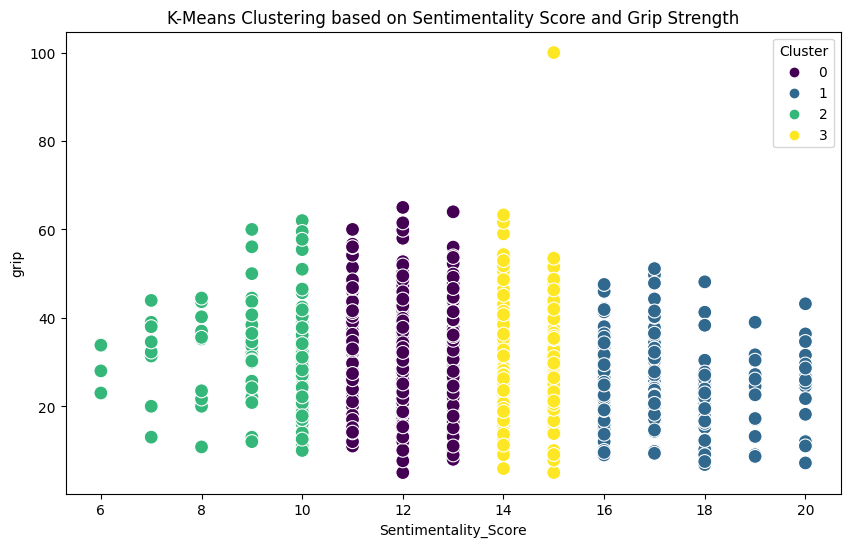

In [ ]:
cluster_and_plot('Sentimentality_Score', 'grip', 'K-Means Clustering based on Sentimentality Score and Grip Strength')